In [305]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pandas as pd
from scipy import spatial
from datetime import datetime
from datetime import timedelta

In [2]:
# Thomas K. favourites; 1) Low Resolution Sea Ice Drift
# ftp://osisaf.met.no/archive/ice/drift_lr/

In [3]:
# 2) AMSR-2 Global Sea Ice Concentration
# ftp://osisaf.met.no/prod/ice/conc_amsr/

### download data: sea ice drift velocities and concentration

In [4]:
# download latest drift velocities into folder 'drift-velocities'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P drift-velocities ftp://osisaf.met.no/archive/ice/drift_lr/merged/

2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/ [801] -> "drift-velocities/archive/ice/drift_lr/merged/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/ [179] -> "drift-velocities/archive/ice/drift_lr/merged/2009/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ [3023] -> "drift-velocities/archive/ice/drift_lr/merged/2009/12/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2010/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2010/01/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ [3507] -> "drift-velocities/archive/ice/drift_lr/merged/2010/02/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merge

2019-09-03 16:38:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2014/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ [6895] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/.listing" [1]
2019-09-03 16:38:33 URL: ftp://osisaf.met.no/ar

2019-09-03 16:38:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/.listing" [1]
2019-09-03 16:38:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2018/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ [6895] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/ar

2019-09-03 16:38:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907251200-201907271200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907251200-201907271200.nc" [1]
2019-09-03 16:38:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907261200-201907281200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907261200-201907281200.nc" [1]
2019-09-03 16:38:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907271200-201907291200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907271200-201907291200.nc" [1]
2019-09-03 16:38:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907281200-201907301200.nc [789356] -> "dr

2019-09-03 16:39:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908021200-201908041200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908021200-201908041200.nc" [1]
2019-09-03 16:39:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908031200-201908051200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908031200-201908051200.nc" [1]
2019-09-03 16:39:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908041200-201908061200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908041200-201908061200.nc" [1]
2019-09-03 16:39:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908051200-201908071200.nc [789356] -> "dr

2019-09-03 16:39:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908011200-201908031200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908011200-201908031200.nc" [1]
2019-09-03 16:39:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908021200-201908041200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908021200-201908041200.nc" [1]
2019-09-03 16:39:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908031200-201908051200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908031200-201908051200.nc" [1]
2019-09-03 16:39:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908041200-201908061200.nc [615580] -> "dr

2019-09-03 16:39:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908301200-201909011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908301200-201909011200.nc" [1]
2019-09-03 16:39:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908311200-201909021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908311200-201909021200.nc" [1]
2019-09-03 16:39:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc" [1]
2019-09-03 16:39:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908311200-201909021200.nc [615580] -> "dr

In [22]:
# download sea ice concentration into folder 'seaice-concentration'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P seaice-concentration ftp://osisaf.met.no/prod/ice/conc_amsr/

2019-07-12 14:12:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ [14111] -> "seaice-concentration/prod/ice/conc_amsr/.listing" [1]
2019-07-12 14:12:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc" [1]
2019-07-12 14:13:02 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc" [1]
2019-07-12 14:13:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc" [1]
2019-07-12 14:13:35 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906121200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-

2019-07-12 17:46:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc" [1]
2019-07-12 17:46:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc" [1]
2019-07-12 17:46:46 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc" [1]
2019-07-12 17:46:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc" [1]
2019-07-12 17:47:04 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906161200.nc [20450448] -> "se

2019-07-12 17:53:31 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc" [1]
2019-07-12 17:53:38 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc" [1]
2019-07-12 17:53:45 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc" [1]
2019-07-12 17:53:53 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc" [1]
2019-07-12 17:54:00 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-t

2019-07-12 17:57:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc" [1]
2019-07-12 17:58:03 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc" [1]
2019-07-12 17:58:10 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc" [1]
2019-07-12 17:58:17 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc" [1]
2019-07-12 17:58:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906251200.nc [15756368] -> "se

In [8]:
ls drift-velocities/archive/ice/drift_lr/merged/2019/07/

ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc
ice_drift_nh_polstere-625_multi-oi_201906301200-201907021200.nc
ice_drift_nh_polstere-625_multi-oi_201907011200-201907031200.nc
ice_drift_nh_polstere-625_multi-oi_201907021200-201907041200.nc
ice_drift_nh_polstere-625_multi-oi_201907031200-201907051200.nc
ice_drift_nh_polstere-625_multi-oi_201907041200-201907061200.nc
ice_drift_nh_polstere-625_multi-oi_201907051200-201907071200.nc
ice_drift_nh_polstere-625_multi-oi_201907061200-201907081200.nc
ice_drift_nh_polstere-625_multi-oi_201907071200-201907091200.nc
ice_drift_nh_polstere-625_multi-oi_201907081200-201907101200.nc
ice_drift_nh_polstere-625_multi-oi_201907091200-201907111200.nc
ice_drift_nh_polstere-625_multi-oi_201907101200-201907121200.nc
ice_drift_nh_polstere-625_multi-oi_201907111200-201907131200.nc
ice_drift_nh_polstere-625_multi-oi_201907121200-201907141200.nc
ice_drift_nh_polstere-625_multi-oi_201907131200-201907151200.nc
ice_drift_nh_polstere-625_multi-oi_20190

In [4]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

### load data

In [5]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

In [287]:
# load a file
OSISAFfile = 'drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200.nc'
fl = Dataset(OSISAFfile)
xc=fl.variables['xc']
yc=fl.variables['yc']
XC,YC=np.meshgrid(xc,yc)

In [377]:
# lon lat on grid
lon_start=np.copy(fl.variables['lon'])
lat_start=np.copy(fl.variables['lat'])

# lon lat at the end of the displacement
lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
lat_end=np.squeeze(fl.variables['lat1'][0,:,:])

# displacement in projection
dX=fl.variables['dX']
dY=fl.variables['dY']

In [378]:
lon_end.min(), lon_end.max(), lon_start.min(), lon_start.max()

(-179.90504, 179.82823, -180.0, 179.52649)

In [379]:
r_earth=6.3675*10**6 # radius of Earth in [m]
rad=np.pi/180.0 # radiant <-> degree

def length_of_latitude_circle(lat=85.):
    return 2*np.pi*r_earth*np.cos(lat*rad) / 1000. # km

In [380]:
# test to plot something
deltalon=lon_end-lon_start
deltalon[deltalon>100.]=deltalon[deltalon>100.]-360. # jump at -180..180
deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. * 3.6 # km/h -> m/s

Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. * 3.6 #km/h -> m/s

plotfield=np.squeeze(np.sqrt(Ufield**2 + Vfield**2)) # m/s
#plotfield=Ufield

/Users/trackow/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


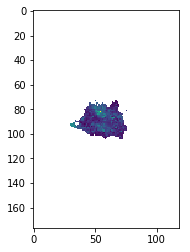

In [381]:
np.size(plotfield)
plt.imshow(plotfield)
plt.show()

#### add geographic information with Basemap

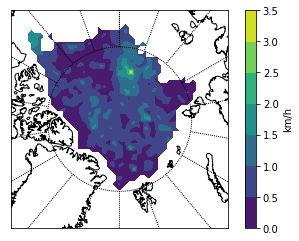

In [382]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

### Compute forward trajectories; class Buoys

In [383]:
class Buoys:
    
    global rad, r_earth
    rad=np.pi/180.0 # radiant <-> degree
    r_earth=6.3675*10**6 # radius of Earth in [m]
    
    def __init__(self, lon_start, lat_start, earliest_date_of_buoy):
        self.oldlon = lon_start*rad
        self.oldlat = lat_start*rad
        self.lon = lon_start*rad
        self.lat = lat_start*rad
        self.old_u = np.zeros(lon_start.shape)
        self.old_v = np.zeros(lon_start.shape)
        self.date = datetime.strptime(earliest_date_of_buoy, "%Y-%m-%d %H:%M:%S")
        self.delta_x = np.zeros(lon_start.shape)
        self.delta_y = np.zeros(lon_start.shape)
        self.u_ice = np.zeros(lon_start.shape)
        self.v_ice = np.zeros(lon_start.shape)
        
    def getdate(self):
        return self.date.strftime("%m/%d/%Y %H:%M:%S")
        
    def trajectory(self, new_u,new_v, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        #save old position in case the drifter leaves the domain
        self.oldlon = self.lon # radiant
        self.oldlat = self.lat # radiant
        
        #displacement vectors
        deltax1 = self.old_u * delta_t
        deltay1 = self.old_v * delta_t
        deltax2 = new_u * delta_t
        deltay2 = new_v * delta_t
        
        #Heun method (2nd order)
        self.lon = self.lon + (0.5*(deltax1 + deltax2) / (r_earth*np.cos(self.lat)) )
        self.lat = self.lat + (0.5*(deltay1 + deltay2) /  r_earth )
        
        # keep degree in range 0..360 and -90..90
        lon_deg=self.lon/rad % 360
        lat_deg=np.clip(self.lat/rad, -90., 90.)
        self.lon = lon_deg*rad
        self.lat = lat_deg*rad
        
        #update velocity here (old value was needed for heun method)
        self.old_u=new_u
        self.old_v=new_v
        
        # update time stamp
        self.date = self.date + timedelta(seconds=delta_t)

        return lon_deg, lat_deg
        
    def updateforcing(self, u_ice, v_ice):
        print("The new forcing is loaded.")
        
        #(self.lon - lon_start) 
        self.u_ice = u_ice
        self.v_ice = v_ice

In [384]:
def find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; in the trajectory code its 0..360
    lon_adjust=objects.lon/rad
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,objects.lat/rad)) 
    # fast KDTree nearest neighbor method
    idx=spatial.KDTree(A).query(tuples)[1]
    
    return Ufield[idx], Vfield[idx]

In [385]:
def find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; poslon is 0..360
    lon_adjust=poslon
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,poslat)) 
    
    # fast KDTree nearest neighbor method
    return spatial.KDTree(A).query(tuples)[1]

### Generate DataFrame of buoy positions and dates

In [386]:
# pick some locations here
poslon=np.array([160.,157.,163.,160.,157.,163.,82.,88.,80.])
poslat=np.array([84.,84.,85.,83.,83.,83.,84.,87.,88.])
# find the closest point on OSISAF grid
idx=find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat)

# starting points (black)
test_startlo=lon_start[:,:].flatten()[idx]
test_startla=lat_start[:,:].flatten()[idx]

# end points (yellow)
test_endlo=lon_end[:,:].flatten()[idx]
test_endla=lat_end[:,:].flatten()[idx]

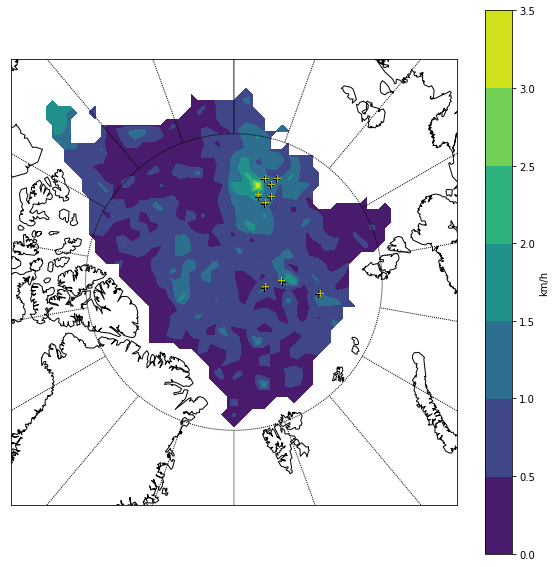

In [387]:
# plot start and end points

fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    lon_map,lat_map=m(test_endlo,test_endla)
    m.plot(lon_map,lat_map,'y+')

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

#### do the actual computation

In [388]:
# config
initialdate='2019-07-29 12:00:00'
num_times=2   # integrate for 2 ...
delta_t=86400 # ... days [seconds]
num_buoys=test_startlo.shape[0]


# generate DataFrame that will be filled with positions
dates = [initialdate]
lons = np.zeros((1, num_buoys))
lats = np.zeros((1, num_buoys)) 
lons_df = pd.DataFrame(data=lons, index=dates)
lats_df = pd.DataFrame(data=lats, index=dates)

# set initial positions at initial date, 0..360, 0..90
lons_df.loc[initialdate] = test_startlo # np.arange(90.,110.,1.)
lats_df.loc[initialdate] = test_startla # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8
2019-07-29 12:00:00,158.962494,156.801407,164.054611,159.443954,157.619858,163.610458,81.869896,90.0,78.690071


In [389]:
# initialize the objects
objects = Buoys(lons_df.loc[initialdate],lats_df.loc[initialdate],initialdate)

In [390]:
# integrate objects forward in time
for i in np.arange(0,num_times):
    print 'This is loop #'+str(i)
    
    # test with constant U,V
    #LON,LAT=objects.trajectory(-1./3.6,0.0,delta_t=86400) # U,V in m/s; 1000/3600 is 1km/h
    
    # evaluate the velocity fields
    # Ufield
    deltalon=lon_end-lon_start
    deltalon[deltalon>100.]=deltalon[deltalon>100.]-360. # jump at -180..180
    deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
    Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. / 3.6 # km/h -> m/s
    # Vfield
    Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. / 3.6 #km/h -> m/s
    # evaluate at buoy position
    U,V=find_UV_atbuoy_pos(lon_start,lat_start, Ufield.flatten(),Vfield.flatten(), objects)
    
    # don't advect buoys when there is no ice
    fixed=np.logical_or(U.mask, V.mask)
    U[fixed]=0.
    V[fixed]=0.
    
    # advect buoys
    LON,LAT=objects.trajectory(U,V,delta_t=delta_t) # U,V in m/s, delta_t in seconds
    
    # append the date and the positions to data frame
    lons_df=lons_df.append(LON.rename(objects.getdate())) # ADD CURRENT TIME HERE
    lats_df=lats_df.append(LAT.rename(objects.getdate()))

This is loop #0
Update buoy positions. Integrate for 24.0 hours.
This is loop #1
Update buoy positions. Integrate for 24.0 hours.


#### plot the trajectories 

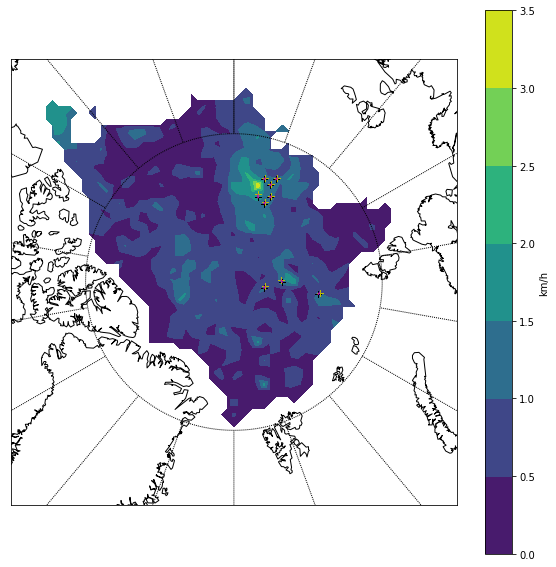

In [391]:
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

# STARTING TEST POINTS
for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    # END TEST POINTS (as given in OSISAF data)
    lon_map,lat_map=m(test_endlo,test_endla)
    m.plot(lon_map,lat_map,'y+')
    
# COMPUTED TRAJECTORY FROM Uice Vice
for buoynum in np.arange(0,num_buoys):
    lon_traj,lat_traj=m(lons_df[buoynum][:].values,lats_df[buoynum][:].values)
    m.plot(lon_traj, lat_traj,'m')
    

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

Looks like the computed trajectory (from Uice,Vice) and the end points coincide :)

### some code that might be useful:

#### find closest point and use the velocites there. OR interpolate

In [255]:
pt = [10., 85.] # query point
#pt = [[10., 85.], [30., 70.]] # query points
A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T
np.shape(A)

(21063, 2)

In [256]:
A[spatial.KDTree(A).query(pt)[1]] # works

array([ 9.462322, 85.039925], dtype=float32)

In [257]:
# evaluate the velocity fields
Ufield=dX[0,:,:].flatten()/72. * 3.6 # displacement in km in 3 days; km/h -> m/s
Vfield=dY[0,:,:].flatten()/72. * 3.6 # km/h -> m/s

In [258]:
idx=spatial.KDTree(A).query(pt)[1]
Ufield[idx]
Vfield[idx]

-0.20046943

In [259]:
objects.lon, objects.lat # radian

(0    2.715593
 1    2.714508
 2    2.721659
 3    2.715598
 4    2.715327
 5    2.722664
 6    1.731320
 7    2.249652
 8    2.412008
 Name: 2019-07-29 12:00:00, dtype: float64, 0    1.414228
 1    1.414501
 2    1.407611
 3    1.414775
 4    1.415152
 5    1.406607
 6    1.447317
 7    1.431350
 8    1.437285
 Name: 2019-07-29 12:00:00, dtype: float64)

In [260]:
d = np.column_stack((objects.lon/rad-180.,objects.lat/rad)) # -180..180 assumed in OSISAF
d

array([[-24.4079617 ,  81.02932346],
       [-24.47016809,  81.04491788],
       [-24.06040291,  80.65017298],
       [-24.40770652,  81.06063451],
       [-24.42322948,  81.08226009],
       [-24.00283634,  80.59265505],
       [-80.80269073,  82.92517275],
       [-51.10442539,  82.01030689],
       [-41.80212318,  82.35036444]])

In [261]:
Ufield[spatial.KDTree(A).query(d)[1]] # works

masked_array(data=[--, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True],
       fill_value=-10000000000.0,
            dtype=float32)

In [262]:
def find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # zip buoy lon and lat arrays to (lon,lat) tuples
    tuples = np.column_stack((objects.lon/rad-180.,objects.lat/rad)) # -180..180 assumed in OSISAF
    # KDTree nearest neighbor implementation
    idx=spatial.KDTree(A).query(tuples)[1]
    
    return Ufield[idx], Vfield[idx]

In [263]:
U,V=find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects)

In [264]:
# return masked values if field is masked at this position
U, V

(masked_array(data=[--, --, --, --, --, --, --, --, --],
              mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                     True],
        fill_value=-10000000000.0,
             dtype=float32),
 masked_array(data=[--, --, --, --, --, --, --, --, --],
              mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                     True],
        fill_value=-10000000000.0,
             dtype=float32))

In [306]:
datetime.now() + timedelta(seconds=86400)

datetime.datetime(2019, 9, 8, 16, 9, 33, 972117)

In [310]:
datetime.now().strftime("%m/%d/%Y %H:%M:%S") + timedelta(seconds=86400)
datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")

TypeError: cannot concatenate 'str' and 'datetime.timedelta' objects

In [313]:
datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")

datetime.datetime(2019, 7, 29, 12, 0)

In [ ]:
Thomas Krumpen:

OSISAF, U V sea ice drift osisaf.met.no ice drift 
Ice concentration + ice drift

Simpel selber machen in python! (allgemein dass auf Eisberg erweiterbar)
Parcels nehmen als Test

Download Thomas‘ Favoriten: Low Resolution Sea Ice Drift
AMSR-2 Global Sea Ice Concentration

Auf jeden Fall täglich auf dem Schiff

Rückwärts rechnen für die 

Meereisportal.de (Datenportal), 30km über ein halbes Jahr Genauigkeit. Alle laden und gut einstellen


Offiziell chief Scientist? Cruise leader

Parallel, sea ice age Karte machen, parallel, Durchmischung, leads, Alleinstellungsmerkmal

MOSAIC school ensemble machen für SiDFex?

DWD forecast available, at ship position, get a file before

Leuten verschiedenen Instrumenten zuordnen, P ist GPS, M mit Landen, L 48 Stunden mit Schiff dran

STAS Kurs für Helikopter, Verena Mohaupt organisiert das, ich würde mal bisschen warten (Du wirst den schon kriegen)

Wladimir Sokolov, AHRI St. Petersburg

Russisch-Kurs von Anne abends, Mottoparties, Gitarre, Ukulele

Social Events vielleicht den Studenten an die Hand geben, Gitarre, Ukulele, …
